In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import numpy as np 
import pandas as pd
import sklearn
from scipy import stats
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import NotFittedError

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('C:/Users/shrey/OneDrive/Desktop/da/winequality-red.csv')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64


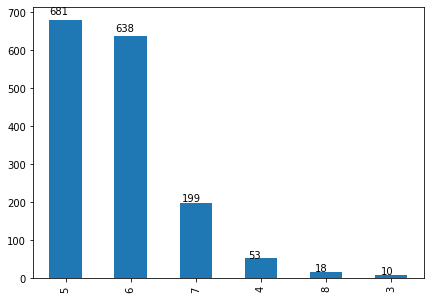

In [9]:
x = df["quality"].value_counts().plot.bar(figsize=(7,5))
for i in x.patches:
    x.annotate(str(i.get_height()), (i.get_x() * 1.02, i.get_height() * 1.02))
print(df["quality"].value_counts(normalize=True)*100)

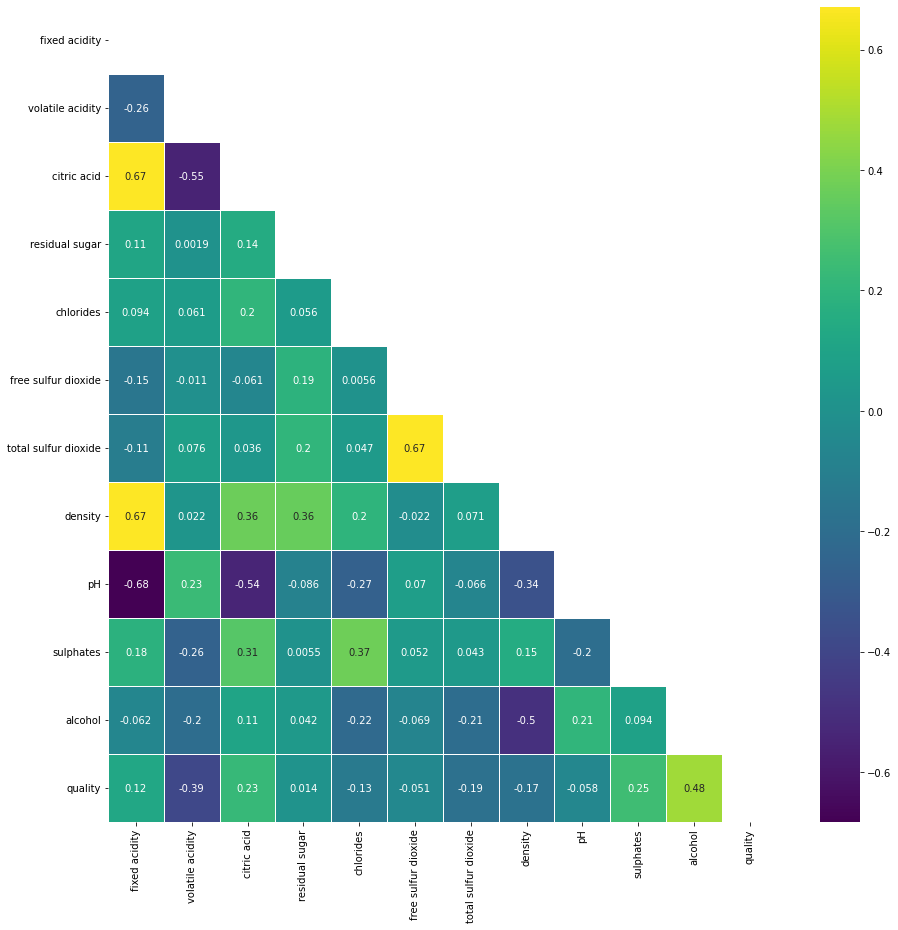

In [10]:
plt.figure(figsize=(15, 15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis");

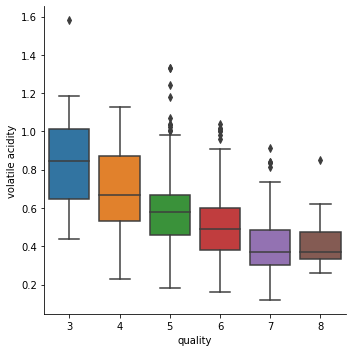

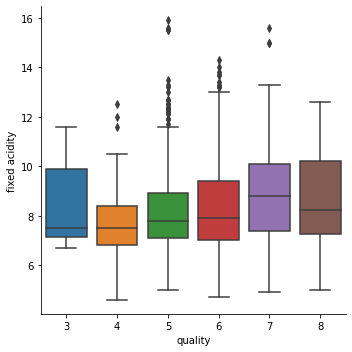

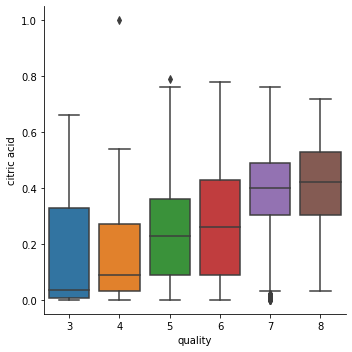

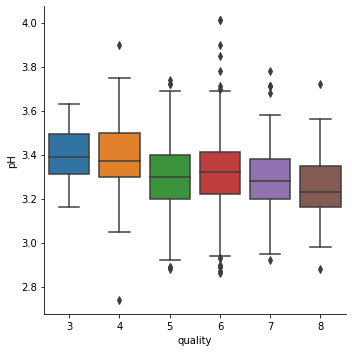

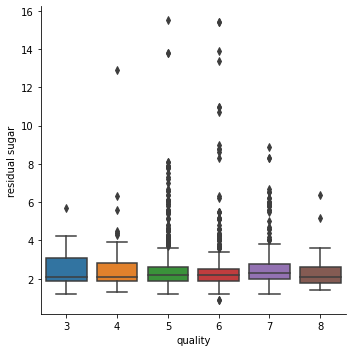

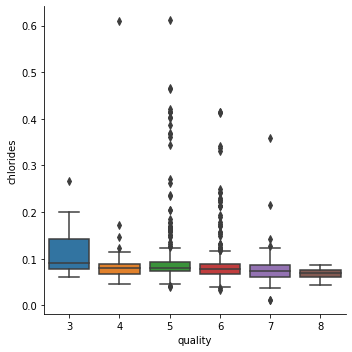

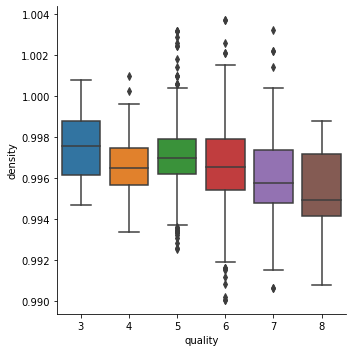

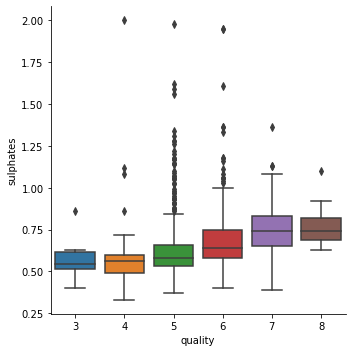

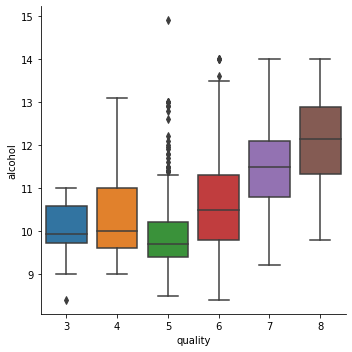

In [11]:
sns.catplot(x="quality", y="volatile acidity", data=df, kind="box")
sns.catplot(x="quality", y="fixed acidity", data=df, kind="box")
sns.catplot(x="quality", y="citric acid", data=df, kind="box")
sns.catplot(x="quality", y="pH", data=df, kind="box")
sns.catplot(x="quality", y="residual sugar", data=df, kind="box")
sns.catplot(x="quality", y="chlorides", data=df, kind="box")
sns.catplot(x="quality", y="density", data=df, kind="box")
sns.catplot(x="quality", y="sulphates", data=df, kind="box")
sns.catplot(x="quality", y="alcohol", data=df, kind="box");

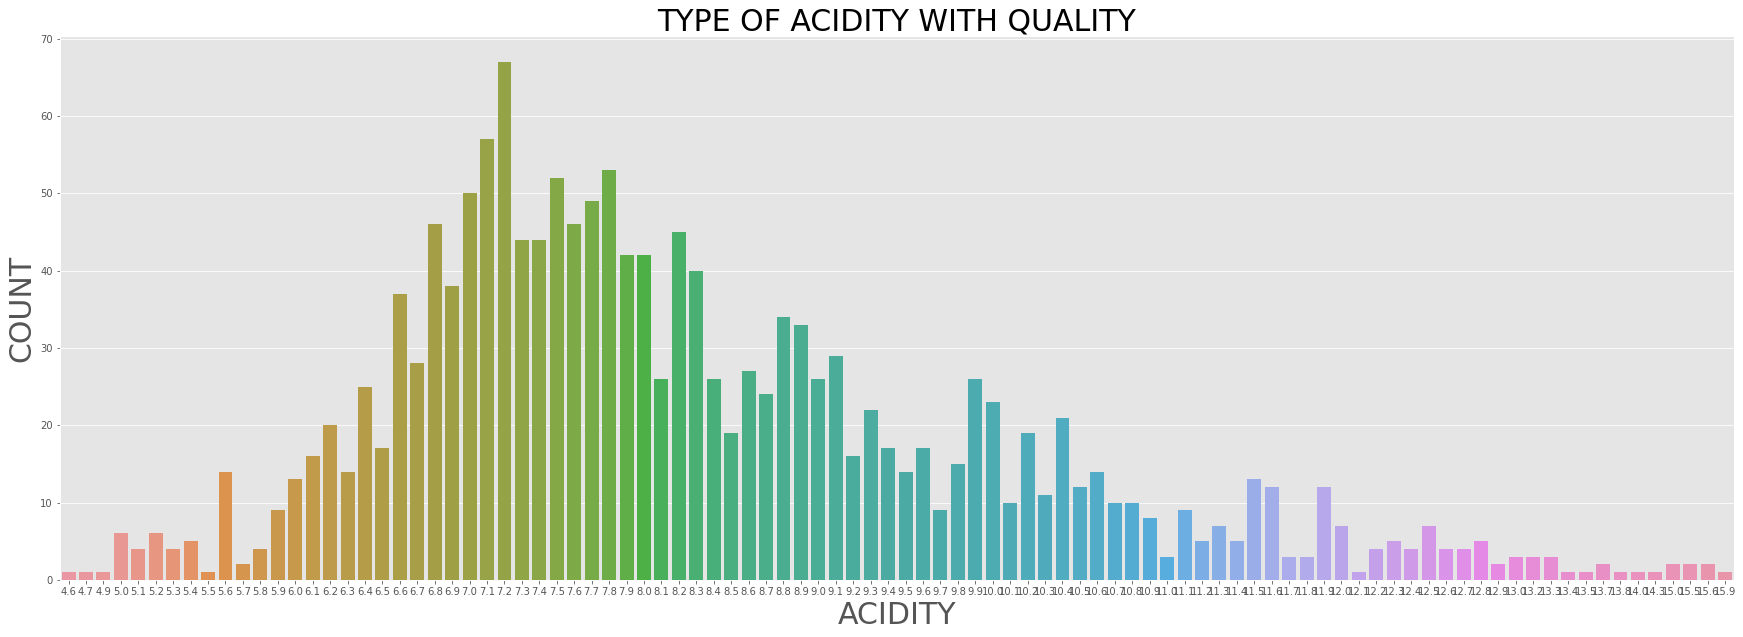

In [12]:
acidity_count = df["fixed acidity"].value_counts().reset_index()
plt.figure(figsize=(30, 10))
plt.style.use("ggplot")
sns.barplot(x=acidity_count["index"], y=acidity_count["fixed acidity"])
plt.title("TYPE OF ACIDITY WITH QUALITY", fontsize=30)
plt.xlabel("ACIDITY", fontsize=30)
plt.ylabel("COUNT", fontsize=30)
plt.show()

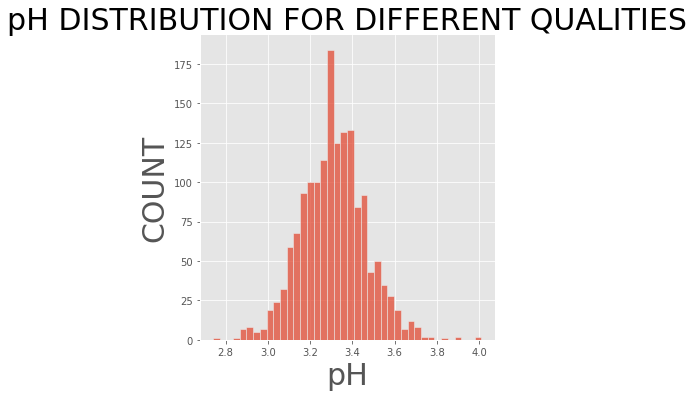

In [13]:
plt.style.use("ggplot")
sns.displot(df["pH"]);
plt.title("pH DISTRIBUTION FOR DIFFERENT QUALITIES", fontsize=30)
plt.xlabel("pH", fontsize=30)
plt.ylabel("COUNT", fontsize=30)
plt.show()

In [14]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers

In [15]:
print("number of outliers found are  ",
      len(df.loc[detect_outliers(df.columns[:-1])]))

number of outliers found are   120


In [16]:
df.loc[detect_outliers(df.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.500000,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.800000,7
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6
1475,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7


In [17]:
df["good"] = 0

In [18]:
df.loc[df["quality"] > 6, "good"] = 1

0    86.429018
1    13.570982
Name: good, dtype: float64


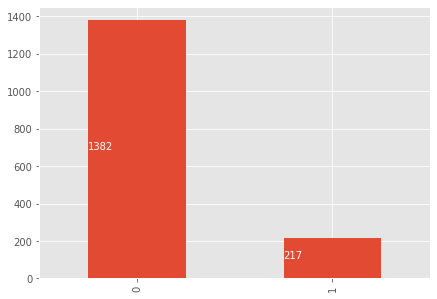

In [19]:
x = df["good"].value_counts().plot.bar(figsize=(7,5))
for i in x.patches:
    x.annotate(str(i.get_height()), (i.get_x(), i.get_height() * 0.5), color="white")
    
print(df["good"].value_counts(normalize=True)*100)

In [20]:
features = df.columns[:-2]
output = df.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'], 

Labels: 
good


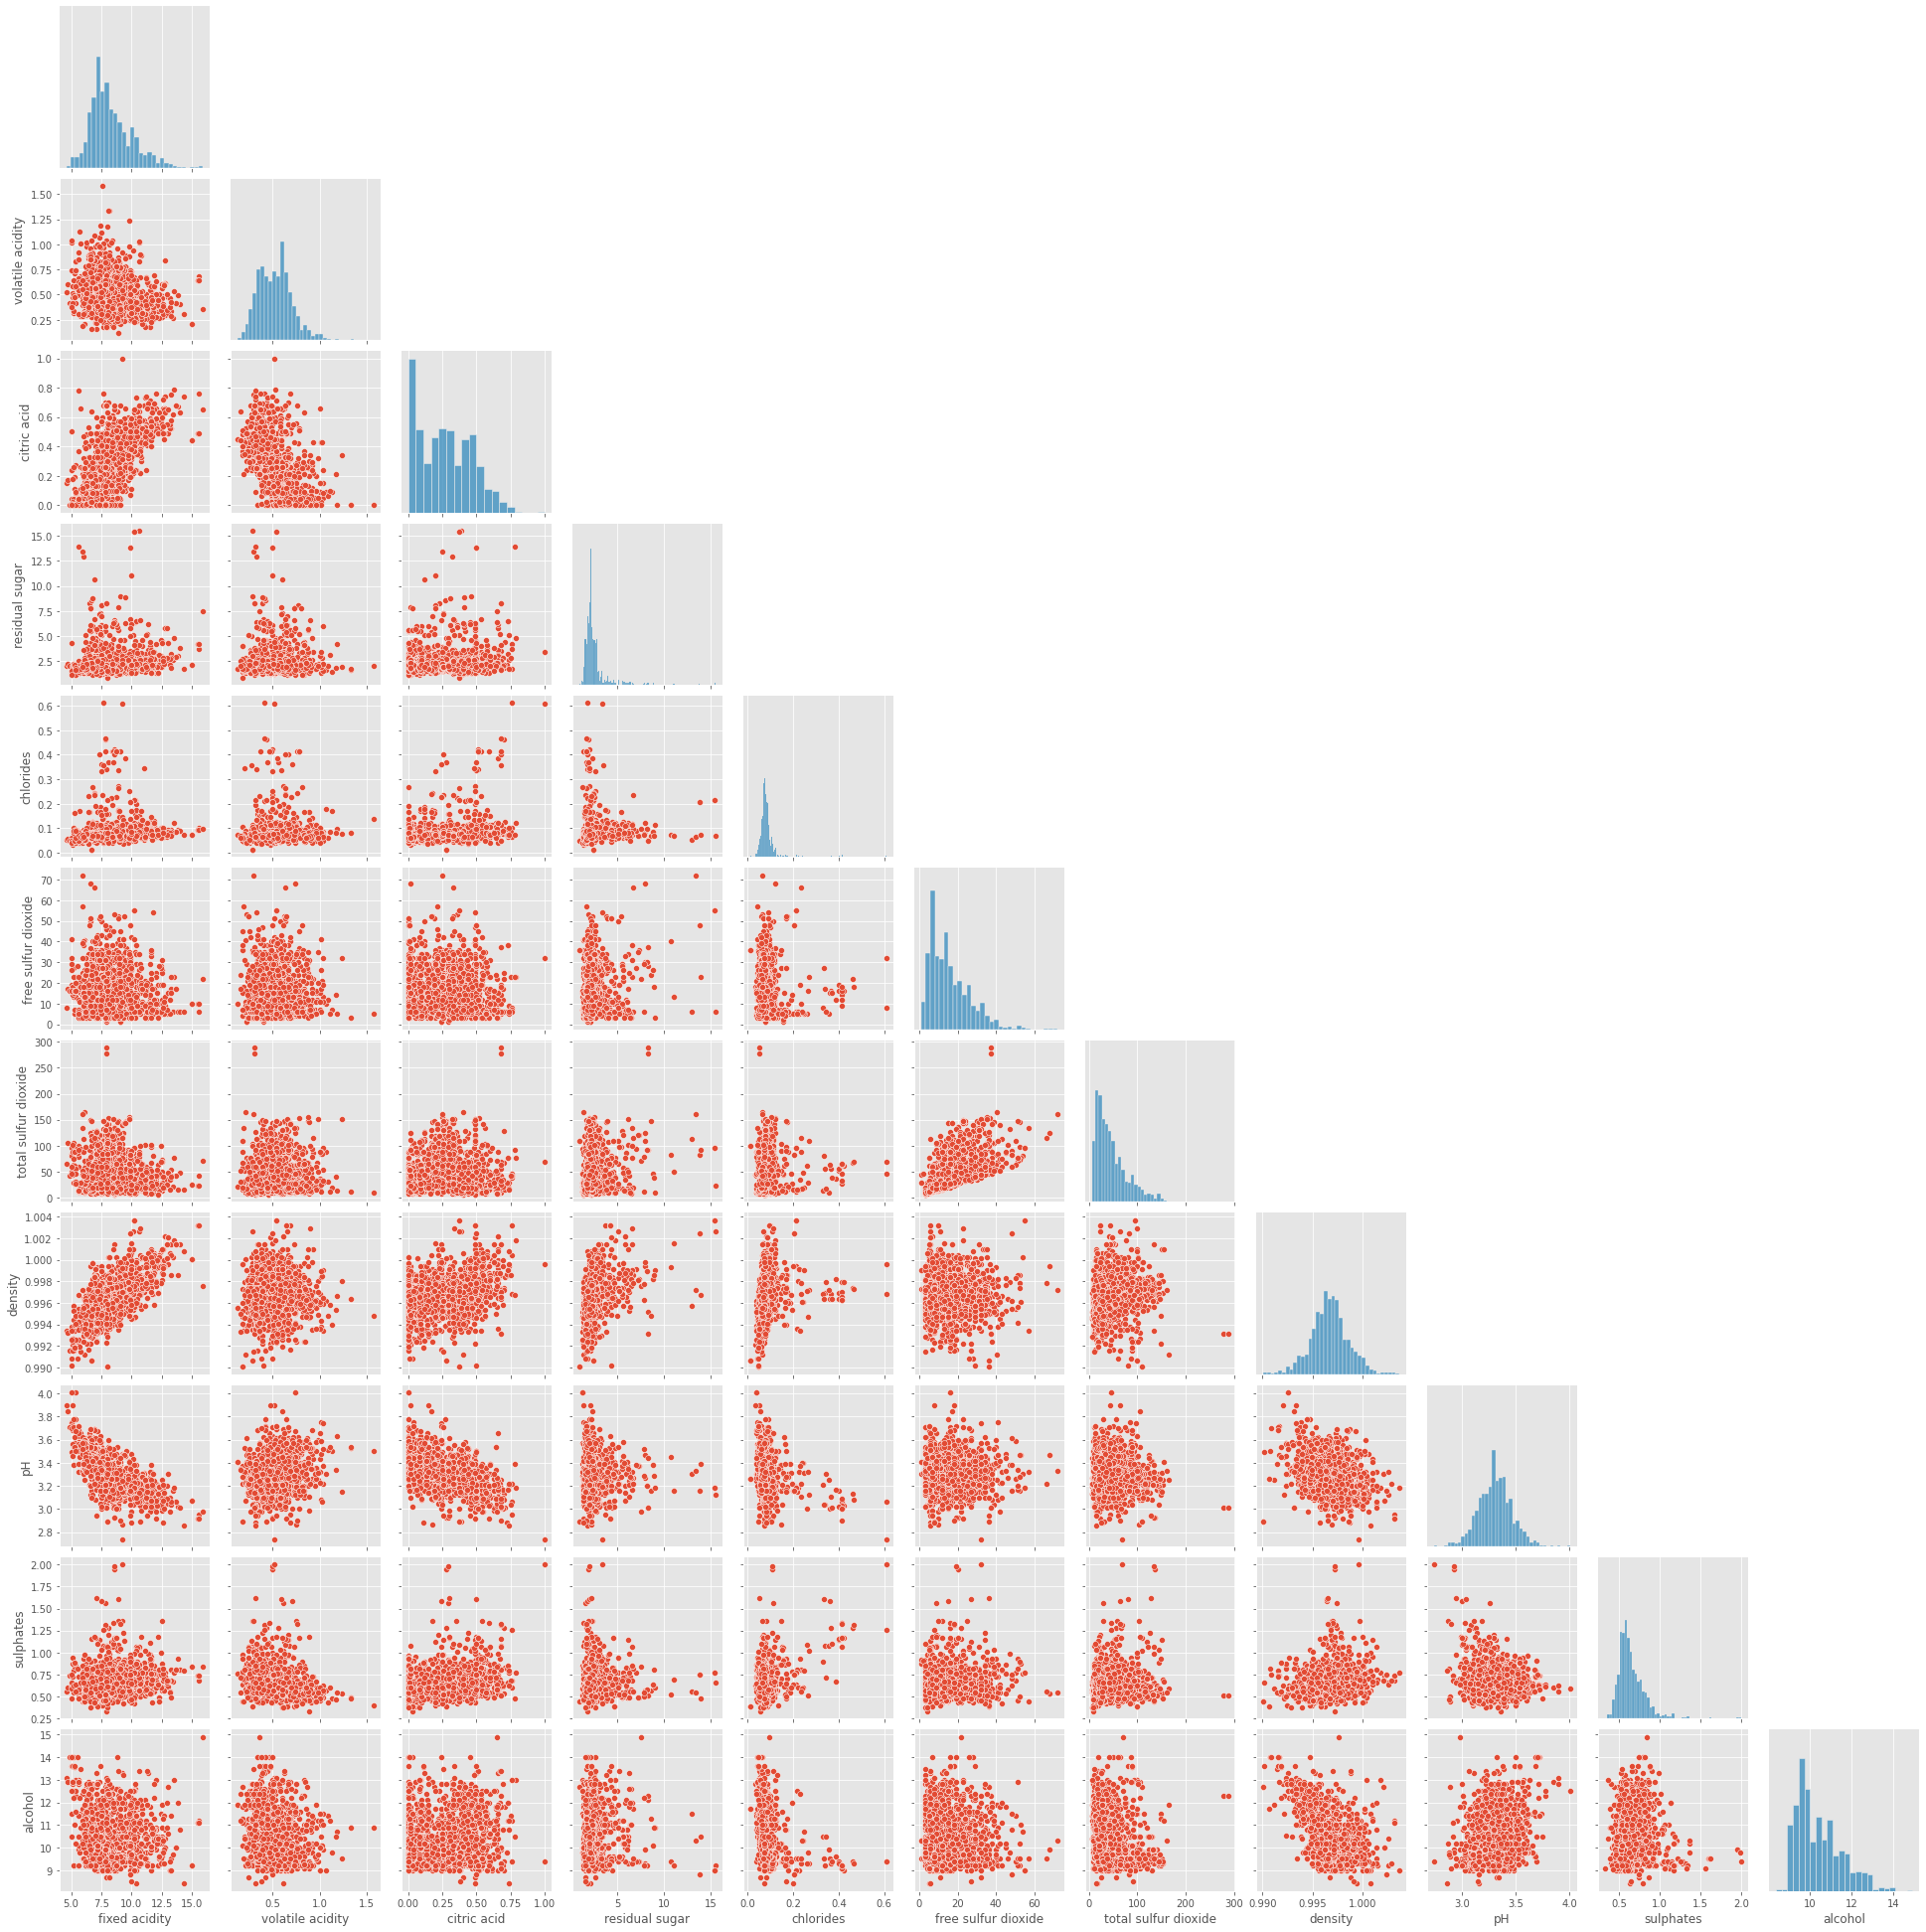

In [21]:
sns.pairplot(df[features],palette='coolwarm',corner = True)
plt.show()

In [22]:
for x in features:
    print('Feature:{}\n Skew = {} \n\n'.format(x,df[x].skew()))

Feature:fixed acidity
 Skew = 0.9827514413284587 


Feature:volatile acidity
 Skew = 0.6715925723840199 


Feature:citric acid
 Skew = 0.3183372952546368 


Feature:residual sugar
 Skew = 4.54065542590319 


Feature:chlorides
 Skew = 5.680346571971722 


Feature:free sulfur dioxide
 Skew = 1.250567293314441 


Feature:total sulfur dioxide
 Skew = 1.515531257594554 


Feature:density
 Skew = 0.07128766294927483 


Feature:pH
 Skew = 0.19368349811284427 


Feature:sulphates
 Skew = 2.4286723536602945 


Feature:alcohol
 Skew = 0.8608288068888538 




In [23]:
X = df[features].values
y = df[output].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.275)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 12749, Testing size: 4840


In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
def get_probabilty_output(X_test, model_fitted, value_count=15):
    def highlight_max(data, color='yellow'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]
        else:
            is_max = data == data.max().max()
            return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
    y_scores = model_fitted.predict_proba(X_test)
    prob_df = pd.DataFrame(y_scores*100).head(value_count)
    styled_df = prob_df.style.background_gradient(cmap='Reds')
    styled_df = styled_df.highlight_max(axis=1, color='green')
    return styled_df

In [26]:
def get_classification_report(y_test,predictions,average="macro"):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")
    
    acc = accuracy_score(y_test, predictions)
    pre = precision_score(y_test, predictions, average=average)
    rec = recall_score(y_test, predictions, average=average)
    print(classification_report(y_test, predictions, digits=3))
    print("Overall Accuracy:", acc)
    print("Overall Precision:", pre)
    print("Overall Recall:", rec)
    return acc,pre,rec

In [27]:
parameters_KNN = {
    "n_neighbors" : [2,5,7,15,20],
    "weights" : ('uniform','distance'),
    "algorithm" : ('auto','ball_tree','kd_tree','brute'),
    'p': [1,2,5,7]
}

model_KNN = KNN(n_jobs=-1)
model_KNN_with_best_params = GridSearchCV(model_KNN, parameters_KNN)
model_KNN_with_best_params.fit(X_train,y_train)
model_KNN_best_params = model_KNN_with_best_params.best_params_

In [28]:
model_KNN_best_params

{'algorithm': 'auto', 'n_neighbors': 20, 'p': 2, 'weights': 'distance'}

In [29]:
predictions_KNN = model_KNN_with_best_params.predict(X_test)
print("Predictions:",predictions_KNN[:15])
print("Actual:",y_test[:15])

Predictions: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Actual: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [30]:
get_probabilty_output(X_test=X_test, model_fitted=model_KNN_with_best_params)

,0,1
0,95.702885,4.297115
1,100.000000,0.000000
2,95.534658,4.465342
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,54.177295,45.822705
8,95.676680,4.323320
9,100.000000,0.000000


              precision    recall  f1-score   support

           0      0.955     0.957     0.956       396
           1      0.605     0.591     0.598        44

    accuracy                          0.920       440
   macro avg      0.780     0.774     0.777       440
weighted avg      0.920     0.920     0.920       440

Overall Accuracy: 0.9204545454545454
Overall Precision: 0.779655556206432
Overall Recall: 0.773989898989899


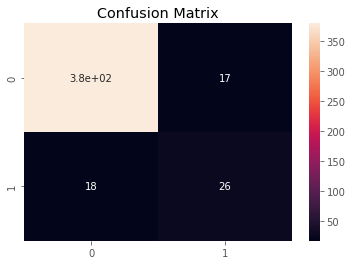

In [31]:
acc_KNN,pre_KNN,rec_KNN = get_classification_report(y_test,predictions_KNN)

In [32]:
parameters_SVC = {
    "C": [1, 5, 10, 20],
    "kernel": ('linear','poly','rbf'),
    "degree": [2,4,6] 
    
}

model_SVC = SVC(probability=True)
model_SVC_with_best_params = GridSearchCV(model_SVC, parameters_SVC)
model_SVC_with_best_params.fit(X_train,y_train)
model_SVC_best_params = model_SVC_with_best_params.best_params_

In [33]:
model_SVC_best_params

{'C': 20, 'degree': 2, 'kernel': 'rbf'}

In [34]:
predictions_SVC = model_SVC_with_best_params.predict(X_test)
print("Predictions:",predictions_SVC[:15])
print("Actual:",y_test[:15])

Predictions: [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
Actual: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [35]:
get_probabilty_output(X_test=X_test, model_fitted=model_SVC_with_best_params)

,0,1
0,87.455500,12.544500
1,96.641740,3.358260
2,98.689602,1.310398
3,94.049501,5.950499
4,99.148529,0.851471
5,30.574787,69.425213
6,90.640700,9.359300
7,70.236513,29.763487
8,90.595857,9.404143
9,98.278704,1.721296


              precision    recall  f1-score   support

           0      0.954     0.944     0.949       396
           1      0.542     0.591     0.565        44

    accuracy                          0.909       440
   macro avg      0.748     0.768     0.757       440
weighted avg      0.913     0.909     0.911       440

Overall Accuracy: 0.9090909090909091
Overall Precision: 0.747874149659864
Overall Recall: 0.7676767676767677


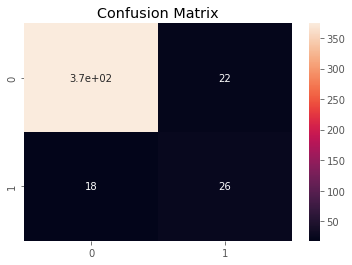

In [36]:
acc_SVC,pre_SVC,rec_SVC = get_classification_report(y_test,predictions_SVC)

In [37]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [38]:
predictions_NB = model_NB.predict(X_test)
print("Predictions:",predictions_NB[:15])
print("Actual:",y_test[:15])

Predictions: [0 0 0 0 0 1 0 1 0 0 0 1 0 1 0]
Actual: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [39]:
get_probabilty_output(X_test=X_test, model_fitted=model_NB)

,0,1
0,98.889017,1.110983
1,97.079658,2.920342
2,88.668477,11.331523
3,99.877936,0.122064
4,99.919118,0.080882
5,18.615884,81.384116
6,98.359706,1.640294
7,47.737587,52.262413
8,98.492715,1.507285
9,99.728019,0.271981


              precision    recall  f1-score   support

           0      0.967     0.876     0.919       396
           1      0.395     0.727     0.512        44

    accuracy                          0.861       440
   macro avg      0.681     0.802     0.716       440
weighted avg      0.909     0.861     0.878       440

Overall Accuracy: 0.8613636363636363
Overall Precision: 0.6808177722755253
Overall Recall: 0.8017676767676768


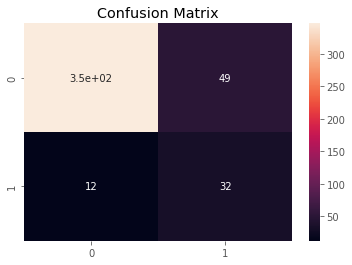

In [40]:
acc_NB,pre_NB,rec_NB = get_classification_report(y_test,predictions_NB)

In [41]:
parameters_DT = {
    'criterion':('gini','entropy'),
    'max_features': ('auto','sqrt','log2')
}


model_DT = DecisionTreeClassifier()
model_DT_with_best_params = GridSearchCV(model_DT, parameters_DT)
model_DT_with_best_params.fit(X_train,y_train)
model_DT_best_params = model_DT_with_best_params.best_params_
model_DT_with_best_params.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2')})

In [42]:
model_DT_best_params

{'criterion': 'entropy', 'max_features': 'auto'}

In [43]:
predictions_DT = model_DT_with_best_params.predict(X_test)
print("Predictions:",predictions_DT[:15])
print("Actual:",y_test[:15])

Predictions: [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
Actual: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [44]:
get_probabilty_output(X_test=X_test, model_fitted=model_DT_with_best_params)

,0,1
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,0.000000,100.000000
8,100.000000,0.000000
9,100.000000,0.000000


              precision    recall  f1-score   support

           0      0.949     0.932     0.940       396
           1      0.471     0.545     0.505        44

    accuracy                          0.893       440
   macro avg      0.710     0.739     0.723       440
weighted avg      0.901     0.893     0.897       440

Overall Accuracy: 0.8931818181818182
Overall Precision: 0.7095871767730229
Overall Recall: 0.7386363636363635


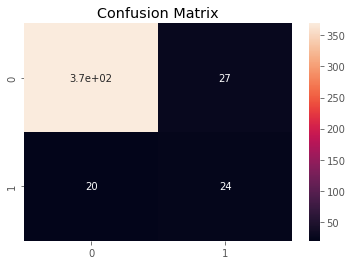

In [45]:
acc_DT,pre_DT,rec_DT = get_classification_report(y_test,predictions_DT)

In [103]:
parameters_RF = {
    'criterion':('gini','entropy'),
    'max_features': ('auto','sqrt','log2'),
    'n_estimators': [100,150,200,250,300]
}


model_RF = RandomForestClassifier(n_jobs=-1)
model_RF_with_best_params = GridSearchCV(model_RF, parameters_RF)
model_RF_with_best_params.fit(X_train,y_train)
model_RF_best_params = model_RF_with_best_params.best_params_
model_RF_with_best_params.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': [100, 150, 200, 250, 300]})

In [104]:
model_RF_best_params

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}

In [105]:
predictions_RF = model_RF_with_best_params.predict(X_test)
print("Predictions:",predictions_DT[:15])
print("Actual:",y_test[:15])

Predictions: [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
Actual: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [106]:
get_probabilty_output(X_test=X_test, model_fitted=model_RF_with_best_params)

,0,1
0,98.000000,2.000000
1,99.000000,1.000000
2,97.000000,3.000000
3,100.000000,0.000000
4,96.000000,4.000000
5,78.000000,22.000000
6,100.000000,0.000000
7,60.000000,40.000000
8,91.000000,9.000000
9,99.000000,1.000000


              precision    recall  f1-score   support

           0      0.946     0.970     0.958       396
           1      0.647     0.500     0.564        44

    accuracy                          0.923       440
   macro avg      0.796     0.735     0.761       440
weighted avg      0.916     0.923     0.918       440

Overall Accuracy: 0.9227272727272727
Overall Precision: 0.7964358157055926
Overall Recall: 0.7348484848484849


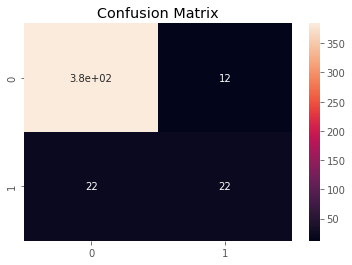

In [107]:
acc_RF,pre_RF,rec_RF = get_classification_report(y_test,predictions_RF)

In [51]:
import xgboost
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
xgboost.set_config(verbosity=0)

In [52]:
xgbc = xgboost.XGBClassifier(verbosity = 0)

In [67]:
parameters_XG = {'gamma': [0],
              'learning_rate': [0.15],
              'max_depth': [8],
              'n_estimators': [80],
              'reg_alpha': [0],
              'reg_lambda': [9.25]
                }


model_XG_with_best_params = GridSearchCV(xgbc, parameters_XG)
model_XG_with_best_params.fit(X_train,y_train)
model_XG_best_params = model_XG_with_best_params.best_params_
model_XG_with_best_params.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [68]:
model_XG_best_params

{'gamma': 0,
 'learning_rate': 0.15,
 'max_depth': 8,
 'n_estimators': 80,
 'reg_alpha': 0,
 'reg_lambda': 9.25}

In [80]:
predictions_XG = model_XG_with_best_params.predict(X_test)
print("Predictions:",predictions_DT[:15])
print("Actual:",y_test[:15])

Predictions: [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
Actual: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [81]:
get_probabilty_output(X_test=X_test, model_fitted=model_XG_with_best_params)

,0,1
0,98.281525,1.718475
1,99.694839,0.305167
2,98.850075,1.149928
3,99.745132,0.254872
4,98.365395,1.634604
5,73.832878,26.167118
6,99.354614,0.645385
7,40.575302,59.424698
8,96.494209,3.505790
9,99.334991,0.665010


              precision    recall  f1-score   support

           0      0.948     0.962     0.955       396
           1      0.605     0.523     0.561        44

    accuracy                          0.918       440
   macro avg      0.777     0.742     0.758       440
weighted avg      0.914     0.918     0.915       440

Overall Accuracy: 0.9181818181818182
Overall Precision: 0.7765121759622937
Overall Recall: 0.7424242424242424


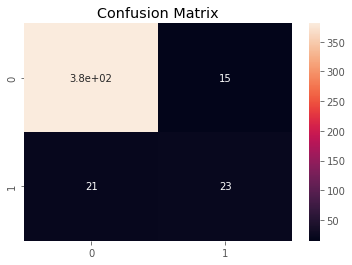

In [82]:
acc_XG,pre_XG,rec_XG = get_classification_report(y_test,predictions_XG)

In [108]:
result = pd.DataFrame(
    [["kNearestNeighbor",acc_KNN,pre_KNN,rec_KNN],
    ["SupportVectorClassifier",acc_SVC,pre_SVC,rec_SVC],
    ["NaiveBayes",acc_NB,pre_NB,rec_NB],
    ["DecisionTree",acc_DT,pre_DT,rec_DT],
    ["RandomForest",acc_RF,pre_RF,rec_RF],
    ["XGBoost",acc_XG,pre_XG,rec_XG]],
    columns=["Classifier","Accuracy","Precision","Recall"]
)
result

,Classifier,Accuracy,Precision,Recall
0,kNearestNeighbor,0.920455,0.779656,0.773990
1,SupportVectorClassifier,0.909091,0.747874,0.767677
2,NaiveBayes,0.861364,0.680818,0.801768
3,DecisionTree,0.893182,0.709587,0.738636
4,RandomForest,0.922727,0.796436,0.734848
5,XGBoost,0.918182,0.776512,0.742424


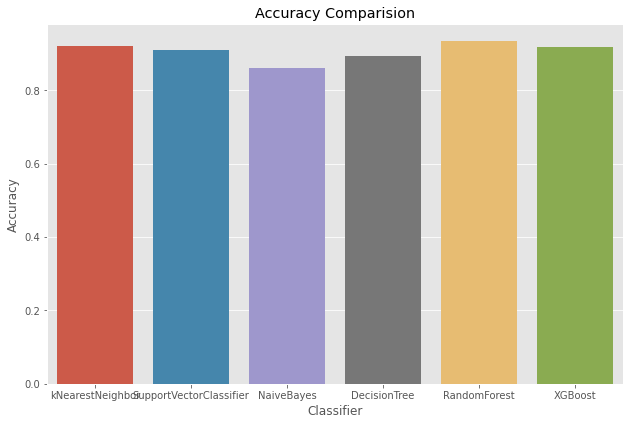

In [73]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=result.Classifier, y=result.Accuracy)
plt.title("Accuracy Comparision")
plt.show()

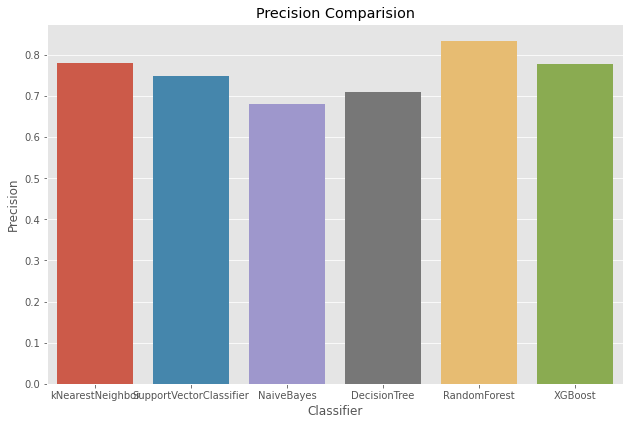

In [74]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=result.Classifier, y=result.Precision)
plt.title("Precision Comparision")
plt.show()

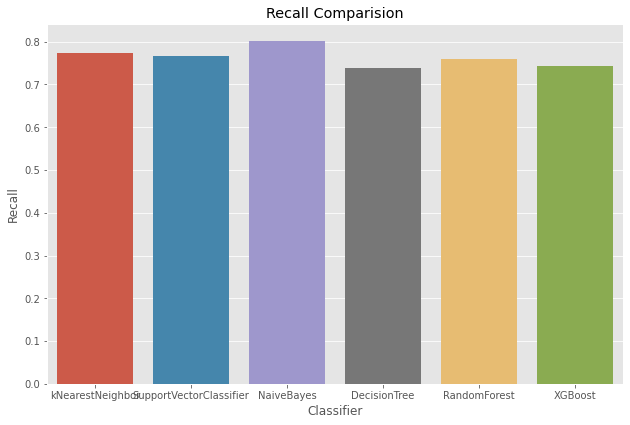

In [61]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=result.Classifier, y=result.Recall)
plt.title("Recall Comparision")
plt.show()